# Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
import warnings
warnings.filterwarnings("ignore")

from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

def plt_dynamic(x, vy, ty, ax,title, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss") #Train Error
    ax.plot(x, ty, 'r', label="Train Loss") #Test Error
    plt.legend()
    plt.grid()
    plt.title(title)
    fig.canvas.draw()

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [8]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [10]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

print("Class label of Sec image :", y_train[5])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])
print("After converting the output into a vector : ",Y_train[5])

Class label of first image : 5
Class label of Sec image : 2
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
After converting the output into a vector :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

### **Model 1: Input(784) - ReLu(512) - Dropout - ReLu(128)- Dropout -Sigmoid(output)**

###Two Hidden Layer

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout


In [17]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.051  => N(0,σ) = N(0,0.051)
# h2 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# out =>  σ=√(2/(fan_in+1) = 0.125  => N(0,σ) = N(0,0.125)


from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_

In [18]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 10s 159us/step - loss: 0.4357 - acc: 0.8677 - val_loss: 0.1425 - val_acc: 0.9562
Epoch 2/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.2077 - acc: 0.9369 - val_loss: 0.1076 - val_acc: 0.9688
Epoch 3/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.1630 - acc: 0.9505 - val_loss: 0.0965 - val_acc: 0.9706
Epoch 4/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.1344 - acc: 0.9593 - val_loss: 0.0821 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.1206 - acc: 0.9633 - val_loss: 0.0758 - val_acc: 0.9769
Epoch 6/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.1107 - acc: 0.9658 - val_loss: 0.0714 - val_acc: 0.9776
Epoch 7/20
60000/

Test score: 0.05960580374380806
Test accuracy: 0.9827


Text(0.5, 1, 'Input(784) - ReLu(512) - Dropout - ReLu(128)- Dropout -Sigmoid(output)')

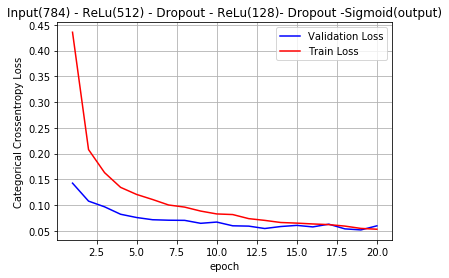

In [22]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss'] #test
ty = history.history['loss']  #train
plt_dynamic(x, vy, ty, ax,"Input(784) - ReLu(512) - Dropout - ReLu(128)- Dropout -Sigmoid(output)")
plt.title("Input(784) - ReLu(512) - Dropout - ReLu(128)- Dropout -Sigmoid(output)")

### **Model 2: Input(784) - ReLu(512) - Dropout - ReLu(256)- Dropout - ReLu(128)- Dropout -Sigmoid(output)**

In [27]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.051  => N(0,σ) = N(0,0.051)
# h2 =>  σ=√(2/(fan_in) = 0.0625  => N(0,σ) = N(0,0.0625)
# h3 =>  σ=√(2/(fan_in) = 0.088  => N(0,σ) = N(0,0.088)
# out =>  σ=√(2/(fan_in+1) = 0.125  => N(0,σ) = N(0,0.125)


from keras.layers import Dropout

model_two = Sequential()

model_two.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_two.add(BatchNormalization())
model_two.add(Dropout(0.5))

model_two.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model_two.add(BatchNormalization())
model_two.add(Dropout(0.5))

model_two.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)) )
model_two.add(BatchNormalization())
model_two.add(Dropout(0.5))

model_two.add(Dense(output_dim, activation='softmax'))


model_two.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

In [28]:
model_two.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_two.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.5734 - acc: 0.8250 - val_loss: 0.1576 - val_acc: 0.9495
Epoch 2/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.2479 - acc: 0.9260 - val_loss: 0.1196 - val_acc: 0.9632
Epoch 3/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.1950 - acc: 0.9419 - val_loss: 0.1053 - val_acc: 0.9671
Epoch 4/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.1602 - acc: 0.9530 - val_loss: 0.0873 - val_acc: 0.9746
Epoch 5/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.1417 - acc: 0.9576 - val_loss: 0.0816 - val_acc: 0.9748
Epoch 6/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.1307 - acc: 0.9610 - val_loss: 0.0750 - val_acc: 0.9763
Epoch 7/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.1164 - acc: 0.9651 - val_loss: 0.

Test score: 0.05544591519308742
Test accuracy: 0.9853


Text(0.5, 1, 'Input(784) - ReLu(512) - Dropout - ReLu(256)- Dropout - ReLu(128)- Dropout -Sigmoid(output)')

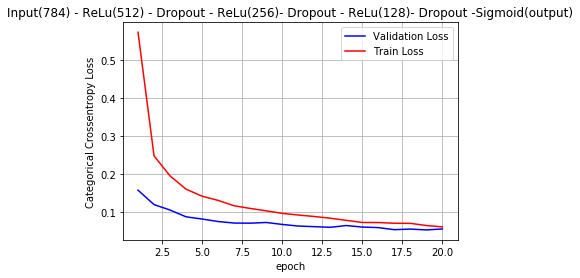

In [29]:
score = model_two.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss'] #test
ty = history.history['loss']  #train
plt_dynamic(x, vy, ty, ax,"Input(784) - ReLu(512) - Dropout - ReLu(256)- Dropout - ReLu(128)- Dropout -Sigmoid(output)")
plt.title("Input(784) - ReLu(512) - Dropout - ReLu(256)- Dropout - ReLu(128)- Dropout -Sigmoid(output)")

### **Model 3: Input(784) - ReLu(628) - Dropout - ReLu(512) - Dropout - ReLu(256)- Dropout - ReLu(128) - Dropout - ReLu(64)- Dropout - Sigmoid(output)**

###Five Hidden Layer

In [30]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.051  => N(0,σ) = N(0,0.051)
# h2 =>  σ=√(2/(fan_in) = 0.056  => N(0,σ) = N(0,0.056)
# h3 =>  σ=√(2/(fan_in) = 0.0625  => N(0,σ) = N(0,0.0625)
# h4 =>  σ=√(2/(fan_in) = 0.088  => N(0,σ) = N(0,0.088)
# h5 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.176  => N(0,σ) = N(0,0.176)


from keras.layers import Dropout

model_three = Sequential()


model_three.add(Dense(628, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_three.add(BatchNormalization())
model_three.add(Dropout(0.5))

model_three.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.056, seed=None)))
model_three.add(BatchNormalization())
model_three.add(Dropout(0.3))

model_three.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model_three.add(BatchNormalization())
model_three.add(Dropout(0.5))

model_three.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)) )
model_three.add(BatchNormalization())
model_three.add(Dropout(0.3))

model_three.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_three.add(BatchNormalization())
model_three.add(Dropout(0.5))

model_three.add(Dense(output_dim, activation='softmax'))


model_three.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 628)               492980    
_________________________________________________________________
batch_normalization_12 (Batc (None, 628)               2512      
_________________________________________________________________
dropout_12 (Dropout)         (None, 628)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               322048    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)              

In [31]:
model_three.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_three.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.7900 - acc: 0.7596 - val_loss: 0.1859 - val_acc: 0.9453
Epoch 2/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.2919 - acc: 0.9194 - val_loss: 0.1525 - val_acc: 0.9556
Epoch 3/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.2270 - acc: 0.9378 - val_loss: 0.1171 - val_acc: 0.9681
Epoch 4/20
60000/60000 [==============================] - 17s 289us/step - loss: 0.1894 - acc: 0.9495 - val_loss: 0.1079 - val_acc: 0.9714
Epoch 5/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.1665 - acc: 0.9552 - val_loss: 0.0920 - val_acc: 0.9742
Epoch 6/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.1497 - acc: 0.9596 - val_loss: 0.0904 - val_acc: 0.9740
Epoch 7/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.1359 - acc: 0.9639 - val_loss: 0.

Test score: 0.06638645441420377
Test accuracy: 0.9828


Text(0.5, 1, 'Input(784) - ReLu(512) - Dropout - ReLu(256)- Dropout - ReLu(128)- Dropout -Sigmoid(output)')

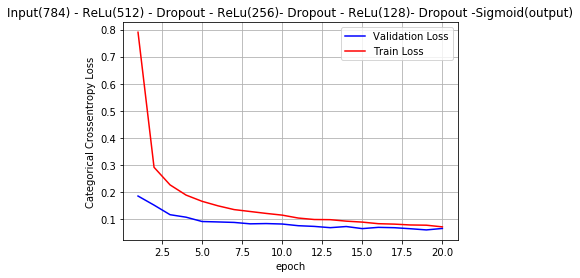

In [32]:
score = model_three.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss'] #test
ty = history.history['loss']  #train
plt_dynamic(x, vy, ty, ax,"Input(784) - ReLu(512) - Dropout - ReLu(256)- Dropout - ReLu(128)- Dropout -Sigmoid(output)")
plt.title("Input(784) - ReLu(512) - Dropout - ReLu(256)- Dropout - ReLu(128)- Dropout -Sigmoid(output)")

In [20]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
TB = PrettyTable()

TB.field_names = ["MODEL", "Hidden layers","Batch Norm", "Dropout", "Optimizer","Accuracy"]
TB.title = "MLP with Keras "
TB.add_row(["Input(784)-ReLu(512)-ReLu(128)-Sigmoid(output)","2", "Yes","Yes","Adam",0.9834])
TB.add_row(["Input(784)-ReLu(512)-ReLu(256)-"+"\n"+"ReLu(128)-Sigmoid(output)", "3", "Yes","Yes","Adam", 0.9853])
TB.add_row(["Input(784)-ReLu(628)-ReLu(512)-"+"\n"+"ReLu(256)-ReLu(128)-ReLu(64)-Sigmoid(output)","5", "Yes","Yes","Adam", 0.9828])
print(TB)


+------------------------------------------------+---------------+------------+---------+-----------+----------+
|                     MODEL                      | Hidden layers | Batch Norm | Dropout | Optimizer | Accuracy |
+------------------------------------------------+---------------+------------+---------+-----------+----------+
| Input(784)-ReLu(512)-ReLu(128)-Sigmoid(output) |       2       |    Yes     |   Yes   |    Adam   |  0.9834  |
|        Input(784)-ReLu(512)-ReLu(256)-         |       3       |    Yes     |   Yes   |    Adam   |  0.9853  |
|           ReLu(128)-Sigmoid(output)            |               |            |         |           |          |
|        Input(784)-ReLu(628)-ReLu(512)-         |       5       |    Yes     |   Yes   |    Adam   |  0.9828  |
|  ReLu(256)-ReLu(128)-ReLu(64)-Sigmoid(output)  |               |            |         |           |          |
+------------------------------------------------+---------------+------------+---------+-------